In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import numpy as np


## Data Preprocessing 
Import data from excel and get the first view of how the data look like
Note there are categorical data like job, marital, education and so on.

In [3]:
bank = pd.read_csv("bank.csv")

In [4]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


#### Descriptive statistics

In [5]:
bank.groupby('y').size()

y
no     4000
yes     521
dtype: int64

The distribution of y is imbanlanced

In [5]:
bank_train, bank_test = model_selection.train_test_split(bank,train_size=0.8,random_state = 123)
bank_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3208,30,blue-collar,married,primary,no,-518,yes,yes,unknown,28,may,244,6,-1,0,unknown,no
146,56,retired,married,primary,no,1906,no,yes,unknown,19,jun,45,9,-1,0,unknown,no
1114,36,technician,divorced,secondary,no,487,no,yes,cellular,11,aug,268,3,-1,0,unknown,no
2465,44,unemployed,single,primary,no,4232,no,no,unknown,16,jun,227,1,-1,0,unknown,no
2508,42,student,married,unknown,no,-7,no,no,telephone,31,jul,41,6,-1,0,unknown,no


###### Split data into training (0.8 of total set) and testing set(0.2 of total set)
Then use get dummies to convert categorical to numerical

In [6]:

tree_class = DecisionTreeClassifier()

one_hot_data_bank_train = pd.get_dummies(bank_train[['job','marital','education','contact','poutcome','y']])
one_hot_data_bank_test = pd.get_dummies(bank_test[['job','marital','education','contact','poutcome','y']])

train = pd.concat([bank_train[['age', 'balance','duration', 'campaign','pdays','previous', 'y']], pd.get_dummies(bank_train[['job','marital','education','contact','poutcome']])], axis =1)
test = pd.concat([bank_test[['age', 'balance','duration', 'campaign','pdays','previous','y']], pd.get_dummies(bank_test[['job','marital','education','contact','poutcome']])], axis =1)
#train[train.columns[~train.columns.isin(['y'])]]


In [14]:
train.head()

,age,balance,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
3208,30,-518,244,6,-1,0,no,0,1,0,...,0,0,0,0,0,1,0,0,0,1
146,56,1906,45,9,-1,0,no,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1114,36,487,268,3,-1,0,no,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2465,44,4232,227,1,-1,0,no,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2508,42,-7,41,6,-1,0,no,0,0,0,...,0,0,1,0,1,0,0,0,0,1


## Model building

# Decision tree

In [15]:
model = tree_class.fit(train[train.columns[~train.columns.isin(['y'])]],train['y'])
result = model.predict(test[test.columns[~test.columns.isin(['y'])]])         


In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print('Accurancy for decision tree is ',accuracy_score(test['y'], result))
print(classification_report(test['y'], result))


Accurancy for decision tree is  0.8707182320441988
              precision    recall  f1-score   support

          no       0.93      0.92      0.93       808
         yes       0.40      0.43      0.42        97

    accuracy                           0.87       905
   macro avg       0.67      0.68      0.67       905
weighted avg       0.87      0.87      0.87       905



###### Tunning decision tree with max_depth and max_left_nodes

In [11]:
#Tuning the decision tree
from sklearn.model_selection import *

dtc_tree = DecisionTreeClassifier(max_depth = 15,max_leaf_nodes = 15)

param_grid_dtc = { "max_depth": np.arange(5,50,1),
                  "max_leaf_nodes": np.arange(5,50,1)
             }
model_dtc=GridSearchCV(dtc_tree, param_grid=param_grid_dtc, scoring = 'accuracy')
model_dtc.fit(train[train.columns[~train.columns.isin(['y'])]],train['y'])
print("Best Hyper Parameters:\n",model_dtc.best_params_)
print("Best Score:\n",model_dtc.best_score_)


Best Hyper Parameters:
 {'max_depth': 7, 'max_leaf_nodes': 14}
Best Score:
 0.8990612319754246


[Text(709.946,1071.4,'X[2] <= 387.5\ngini = 0.207\nsamples = 3616\nvalue = [3192, 424]'),
 Text(461.068,1025.81,'X[30] <= 0.5\ngini = 0.121\nsamples = 2910\nvalue = [2722, 188]'),
 Text(358.116,980.221,'X[2] <= 211.5\ngini = 0.093\nsamples = 2832\nvalue = [2694, 138]'),
 Text(220.898,934.629,'X[0] <= 70.5\ngini = 0.049\nsamples = 1993\nvalue = [1943, 50]'),
 Text(161.466,889.038,'X[14] <= 0.5\ngini = 0.045\nsamples = 1976\nvalue = [1931, 45]'),
 Text(69.4825,843.446,'X[2] <= 90.5\ngini = 0.04\nsamples = 1940\nvalue = [1900, 40]'),
 Text(19.2007,797.854,'X[4] <= 356.5\ngini = 0.008\nsamples = 715\nvalue = [712, 3]'),
 Text(11.5204,752.263,'X[18] <= 0.5\ngini = 0.006\nsamples = 697\nvalue = [695, 2]'),
 Text(7.68027,706.671,'gini = 0.0\nsamples = 619\nvalue = [619, 0]'),
 Text(15.3605,706.671,'X[12] <= 0.5\ngini = 0.05\nsamples = 78\nvalue = [76, 2]'),
 Text(7.68027,661.079,'X[13] <= 0.5\ngini = 0.027\nsamples = 74\nvalue = [73, 1]'),
 Text(3.84014,615.487,'gini = 0.0\nsamples = 66\nvalu

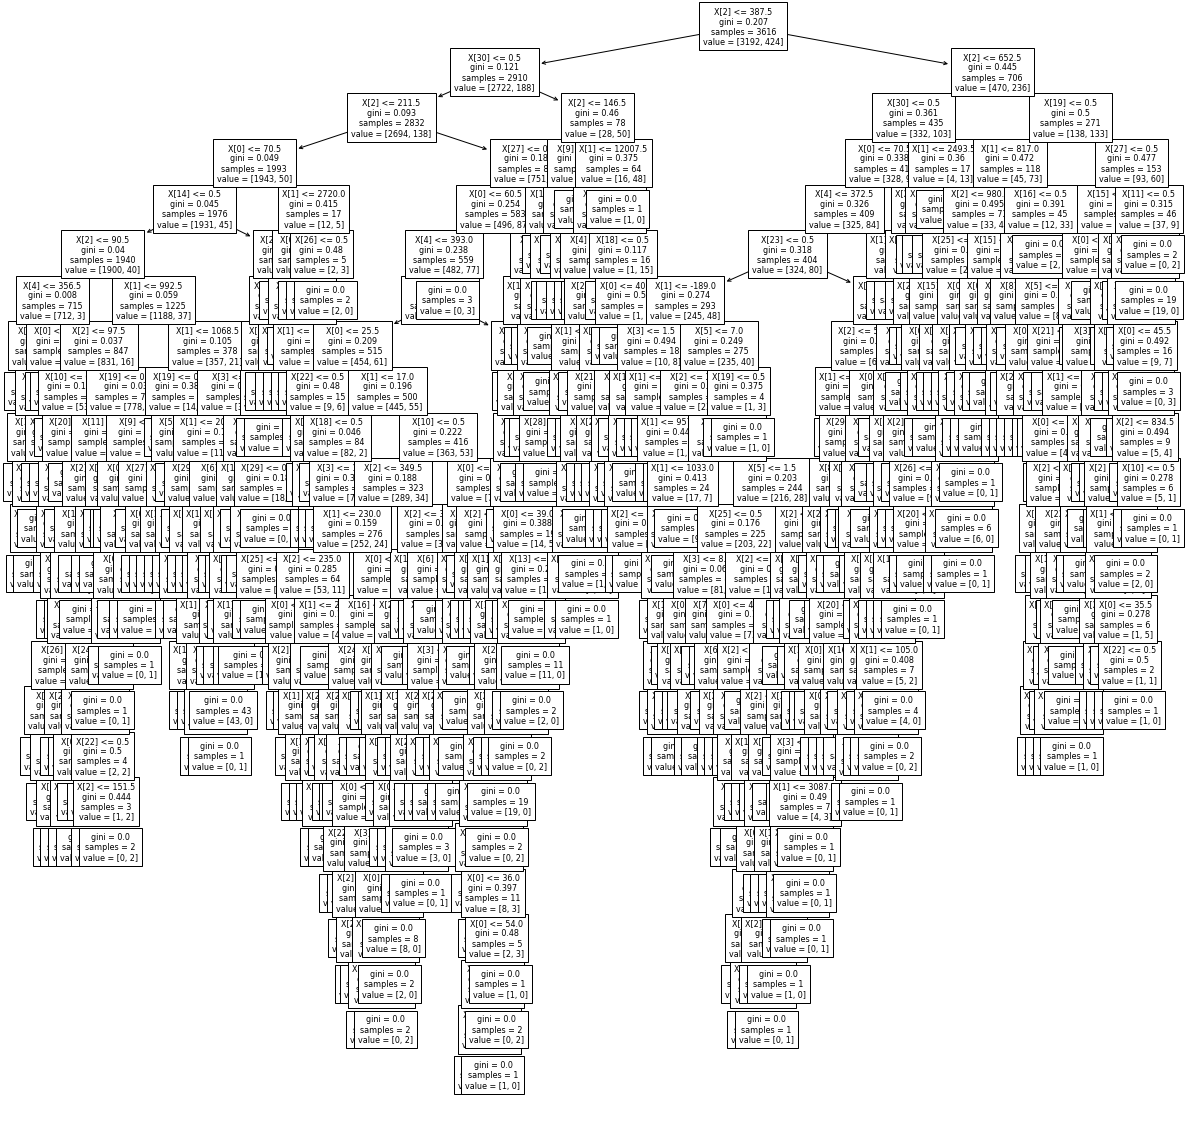

In [99]:
fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(tree_class, fontsize=8)

In [19]:
result_dtc = model_dtc.predict(test[test.columns[~test.columns.isin(['y'])]])         
print('The accurancy rate for decision tree with tunning is', accuracy_score(test['y'], result_dtc))
print(classification_report(test['y'], result_dtc))

The accurancy rate for decision tree with tunning is 0.9116022099447514
              precision    recall  f1-score   support

          no       0.93      0.98      0.95       808
         yes       0.67      0.35      0.46        97

    accuracy                           0.91       905
   macro avg       0.80      0.66      0.71       905
weighted avg       0.90      0.91      0.90       905



ROC AUC=0.861


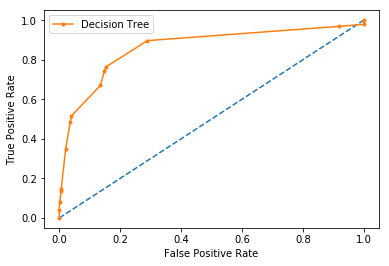

In [20]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
y_test = test['y']
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = model_dtc.predict_proba(test[test.columns[~test.columns.isin(['y'])]])
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('ROC AUC=%.3f' % (lr_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs, pos_label='yes')
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs, pos_label='yes')
pyplot.plot(ns_fpr, ns_tpr, linestyle='--')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Decision Tree')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Adaboost

In [21]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
#abc = AdaBoostClassifier(n_estimators=100,random_state=0)
abc = AdaBoostClassifier()
#result = tree_class.fit(train[train.columns[~train.columns.isin(['y'])]],train['y'])
modelabc =abc.fit(train[train.columns[~train.columns.isin(['y'])]],train['y'])


In [22]:
from sklearn.metrics import confusion_matrix
resultabc = abc.predict(test[test.columns[~test.columns.isin(['y'])]])
confusion_matrix(test['y'], resultabc)

array([[789,  19],
       [ 62,  35]], dtype=int64)

In [24]:
print('accurancy score for adaboost is', accuracy_score(test['y'], resultabc))

accurancy score for adaboost is 0.9104972375690608


In [25]:
print(classification_report(test['y'], resultabc))

              precision    recall  f1-score   support

          no       0.93      0.98      0.95       808
         yes       0.65      0.36      0.46        97

    accuracy                           0.91       905
   macro avg       0.79      0.67      0.71       905
weighted avg       0.90      0.91      0.90       905



In [25]:
from sklearn.model_selection import *
from sklearn.ensemble import AdaBoostClassifier
abc_tunning = AdaBoostClassifier(n_estimators=100, random_state=0)
param_grid_abc = { "n_estimators": np.arange(50,150,1)
             }
model_abc=GridSearchCV(abc_tunning, param_grid=param_grid_abc, scoring = 'accuracy')
model_abc.fit(train[train.columns[~train.columns.isin(['y'])]],train['y'])
resultabc_tuning = model_abc.predict(test[test.columns[~test.columns.isin(['y'])]])


In [26]:
from sklearn.metrics import confusion_matrix
print("Best Hyper Parameters:\n",model_abc.best_params_)
print("Best Score:\n",model_abc.best_score_)
confusion_matrix(test['y'], resultabc_tuning)

Best Hyper Parameters:
 {'n_estimators': 107}
Best Score:
 0.8926992350779059


array([[790,  18],
       [ 62,  35]], dtype=int64)

In [12]:
accuracy_score(test['y'], resultabc_tuning)

0.9116022099447514

In [84]:
print(classification_report(test['y'], resultabc_tuning))

              precision    recall  f1-score   support

          no       0.93      0.98      0.95       808
         yes       0.66      0.36      0.47        97

    accuracy                           0.91       905
   macro avg       0.79      0.67      0.71       905
weighted avg       0.90      0.91      0.90       905



## Cross validation for the tunning

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
X = train[train.columns[~train.columns.isin(['y'])]]
X.append(test[test.columns[~test.columns.isin(['y'])]])

Y = train['y']
Y.append(test['y'])
n_scores = cross_val_score(abc_tunning, X,Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.891 (0.012)


ROC AUC=0.880


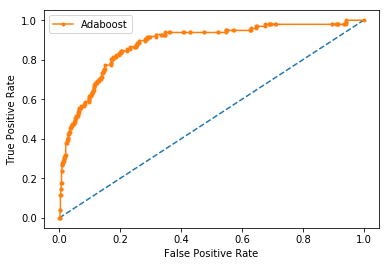

In [35]:
abc_tunning.fit(X, train['y'])
y_test = test['y']
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = abc_tunning.predict_proba(test[test.columns[~test.columns.isin(['y'])]])
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('ROC AUC=%.3f' % (lr_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs, pos_label='yes')
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs, pos_label='yes')
pyplot.plot(ns_fpr, ns_tpr, linestyle='--')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Adaboost')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## Tunning Adaboost with resampling, it didnt improve much

In [34]:
# Resampled traning data set
from collections import Counter
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import numpy as np
import warnings
X=train[train.columns[~train.columns.isin(['y'])]]
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
sm = SMOTE(random_state=0, n_jobs=8, sampling_strategy = 1)
X_resampled, y_resampled = sm.fit_sample(X, train['y'])

print('Original dataset shape:', train['y'])
print('Resampled dataset shape:', Counter(y_resampled))

abc_tunning_withResampling = AdaBoostClassifier(n_estimators=100, random_state=0)
param_grid_abc = { "n_estimators": np.arange(50,150,1)
             }
model_abc=GridSearchCV(abc_tunning_withResampling, param_grid=param_grid_abc, scoring = 'accuracy')
model_abc.fit(X_resampled,y_resampled)
result_imb = model_abc.predict(test[test.columns[~test.columns.isin(['y'])]])

print(classification_report(test['y'], result_imb))

Original dataset shape: 3208    no
146     no
1114    no
2465    no
2508    no
        ..
1593    no
4060    no
1346    no
3454    no
3582    no
Name: y, Length: 3616, dtype: object
Resampled dataset shape: Counter({'no': 3192, 'yes': 3192})
              precision    recall  f1-score   support

          no       0.94      0.96      0.95       808
         yes       0.58      0.44      0.50        97

    accuracy                           0.91       905
   macro avg       0.76      0.70      0.73       905
weighted avg       0.90      0.91      0.90       905



# Gradient boost

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(max_features='auto',random_state = 0,n_estimators=50,learning_rate=0.5)
gbc.fit(train[train.columns[~train.columns.isin(['y'])]],train['y'])
resultgbc =gbc.predict(test[test.columns[~test.columns.isin(['y'])]])
confusion_matrix(test['y'], resultgbc)

array([[782,  26],
       [ 58,  39]], dtype=int64)

In [37]:
print('Accuracy score for gradient boost is',accuracy_score(test['y'], resultgbc))

Accuracy score for gradient boost is 0.907182320441989


In [38]:
print(classification_report(test['y'], resultgbc))

              precision    recall  f1-score   support

          no       0.93      0.97      0.95       808
         yes       0.60      0.40      0.48        97

    accuracy                           0.91       905
   macro avg       0.77      0.68      0.72       905
weighted avg       0.90      0.91      0.90       905



In [40]:
# Tunning the GBC
param_grid_gradient = { "n_estimators": np.arange(50,150,1),
                        "learning_rate": np.arange(0.1,1,0.1)}
gbc_tunning = GradientBoostingClassifier(max_features='auto',random_state = 0,n_estimators=50,learning_rate=0.5)
model_gbc=GridSearchCV(gbc_tunning, param_grid=param_grid_gradient, scoring = 'accuracy')
model_gbc.fit(train[train.columns[~train.columns.isin(['y'])]],train['y'])


GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.5,
                                                  max_features='auto',
                                                  n_estimators=50,
                                                  random_state=0),
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'n_estimators': array([ 50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149])},
             scoring='accuracy

In [42]:
resultgbc_tuning = model_gbc.predict(test[test.columns[~test.columns.isin(['y'])]])
print('Accuracy score for gradient boost with tunning',accuracy_score(test['y'], resultgbc_tuning))


Accuracy score for gradient boost with tunning 0.9049723756906077


In [43]:
print(classification_report(test['y'], resultgbc_tuning))

              precision    recall  f1-score   support

          no       0.92      0.98      0.95       808
         yes       0.61      0.31      0.41        97

    accuracy                           0.90       905
   macro avg       0.77      0.64      0.68       905
weighted avg       0.89      0.90      0.89       905



In [9]:
# Resampled traning data set
from collections import Counter
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import *
import warnings
X=train[train.columns[~train.columns.isin(['y'])]]
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
sm = SMOTE(random_state=0, n_jobs=8, sampling_strategy = 1)
X_resampled, y_resampled = sm.fit_sample(X, train['y'])

print('Original dataset shape:', train['y'])
print('Resampled dataset shape:', Counter(y_resampled))

param_grid_gradient = { "n_estimators": np.arange(50,150,1),
                        "learning_rate": np.arange(0.1,1,0.1)}
gbc_tunning_with_resample = GradientBoostingClassifier(max_features='auto',random_state = 0,n_estimators=50,learning_rate=0.5)
model_gbc_with_resample=GridSearchCV(gbc_tunning_with_resample, param_grid=param_grid_gradient, scoring = 'accuracy')
model_gbc_with_resample.fit(X_resampled,y_resampled)

result_gbc_with_resample = model_gbc_with_resample.predict(test[test.columns[~test.columns.isin(['y'])]])
print(classification_report(test['y'], result_gbc_with_resample))

Original dataset shape: 3208    no
146     no
1114    no
2465    no
2508    no
        ..
1593    no
4060    no
1346    no
3454    no
3582    no
Name: y, Length: 3616, dtype: object
Resampled dataset shape: Counter({'no': 3192, 'yes': 3192})


NameError: name 'classification_report' is not defined

In [11]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(test['y'], result_gbc_with_resample))
print(confusion_matrix(test['y'], result_gbc_with_resample))

              precision    recall  f1-score   support

          no       0.93      0.95      0.94       808
         yes       0.49      0.42      0.46        97

    accuracy                           0.89       905
   macro avg       0.71      0.69      0.70       905
weighted avg       0.88      0.89      0.89       905

[[766  42]
 [ 56  41]]


In [14]:
model_gbc_with_resample.fit(X_resampled,y_resampled)

GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.5,
                                                  max_features='auto',
                                                  n_estimators=50,
                                                  random_state=0),
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'n_estimators': array([ 50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149])},
             scoring='accuracy

ROC AUC=0.851


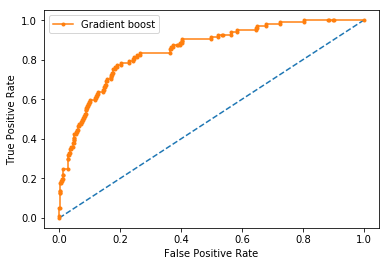

In [17]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
y_test = test['y']
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = model_gbc_with_resample.predict_proba(test[test.columns[~test.columns.isin(['y'])]])
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('ROC AUC=%.3f' % (lr_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs, pos_label='yes')
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs, pos_label='yes')
pyplot.plot(ns_fpr, ns_tpr, linestyle='--')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Gradient boost')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()